# ***Modelo de Regresion Multiple***

In [44]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [45]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest

In [46]:
catalog.load("model_input_table")

[11/20/25 22:58:08] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=296946;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=997232;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,0,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,0,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,0,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,0,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,0,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,0,185,64.863656,50000.0,5000.0,113000.0,False,True,False,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,0,190,81.192968,35000.0,5000.0,58000.0,False,True,False,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,0,183,79.832192,35000.0,1000.0,66000.0,False,True,False,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,0,190,78.925008,60000.0,5000.0,146000.0,False,True,False,2020


In [47]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=308141;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=285839;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [48]:
df_FIFA.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,0,179,69.0,107500000.0,250000.0,206900000.0,False,False,True,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,0,189,82.0,93000000.0,140000.0,160400000.0,False,False,True,2022


In [49]:
df_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50526 entries, 0 to 50525
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      50526 non-null  object 
 1   Age                       50526 non-null  int64  
 2   Nationality               50526 non-null  object 
 3   Overall                   50526 non-null  int64  
 4   Potential                 50526 non-null  int64  
 5   Club                      50526 non-null  object 
 6   Special                   50526 non-null  int64  
 7   Preferred Foot            50526 non-null  object 
 8   International Reputation  50526 non-null  float64
 9   Weak Foot                 50526 non-null  float64
 10  Skill Moves               50526 non-null  float64
 11  Work Rate                 50526 non-null  object 
 12  Body Type                 50526 non-null  object 
 13  Position                  50526 non-null  object 
 14  Jersey

#### **Importaciones**

In [50]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# -- Importaciónes de scikit learn --

from sklearn.preprocessing import MinMaxScaler  # podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1. Ideal para los features.
from sklearn.preprocessing import LabelEncoder

# -- Procesado y modelado --
from sklearn.linear_model import LinearRegression, Ridge  # Regresion lineal simple y para Regresion lineal multiple
from sklearn.model_selection import train_test_split

# -- Metricas --
# Las metricas nos permite evaluar la calidad, precision, del modelo.
# Estas metricas son utilizadas solo para los modelos de regresión. Para los mdodelo de clasificación son diferentes.

#Preguntas del proceso: ¿Que significa estas metrica?

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

#- Métricas del Modelo de Regresión 
#- Mean Squared Error (MSE)
#- Mean Absolute Error (MAE)
#- Root Mean Squared Error (RMSE)
#- R2 Score: 0.8556033776780865

# -- GridSearchCV -- 

# La funcion o el proposito del GrindSeearch es encontrar de forma automatica, los mejores PARAMETROS para el modelo
# Al finalizaar el Grid, te entrega las metricas mejores metricas del modelo encontrado
# para utilizar el GridSearchCV debes configurar los parametros basicos, puedes agregar mas parametros, agregar y modificar valores segun corresponda
# en simple resumen, su funcion es hacer todo el proceso del modelado y tratar de dar el mejor resultado encontrado.

#Siempre investiga para obtener el mejor resultado, ejemplo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn.model_selection import GridSearchCV

## **Desarrollo del Modelo de Regresión Múltiple**

![Image](https://fhernanb.github.io/libro_regresion/Regresion_con_R_files/figure-html/3d_refrescos_01-1.png)


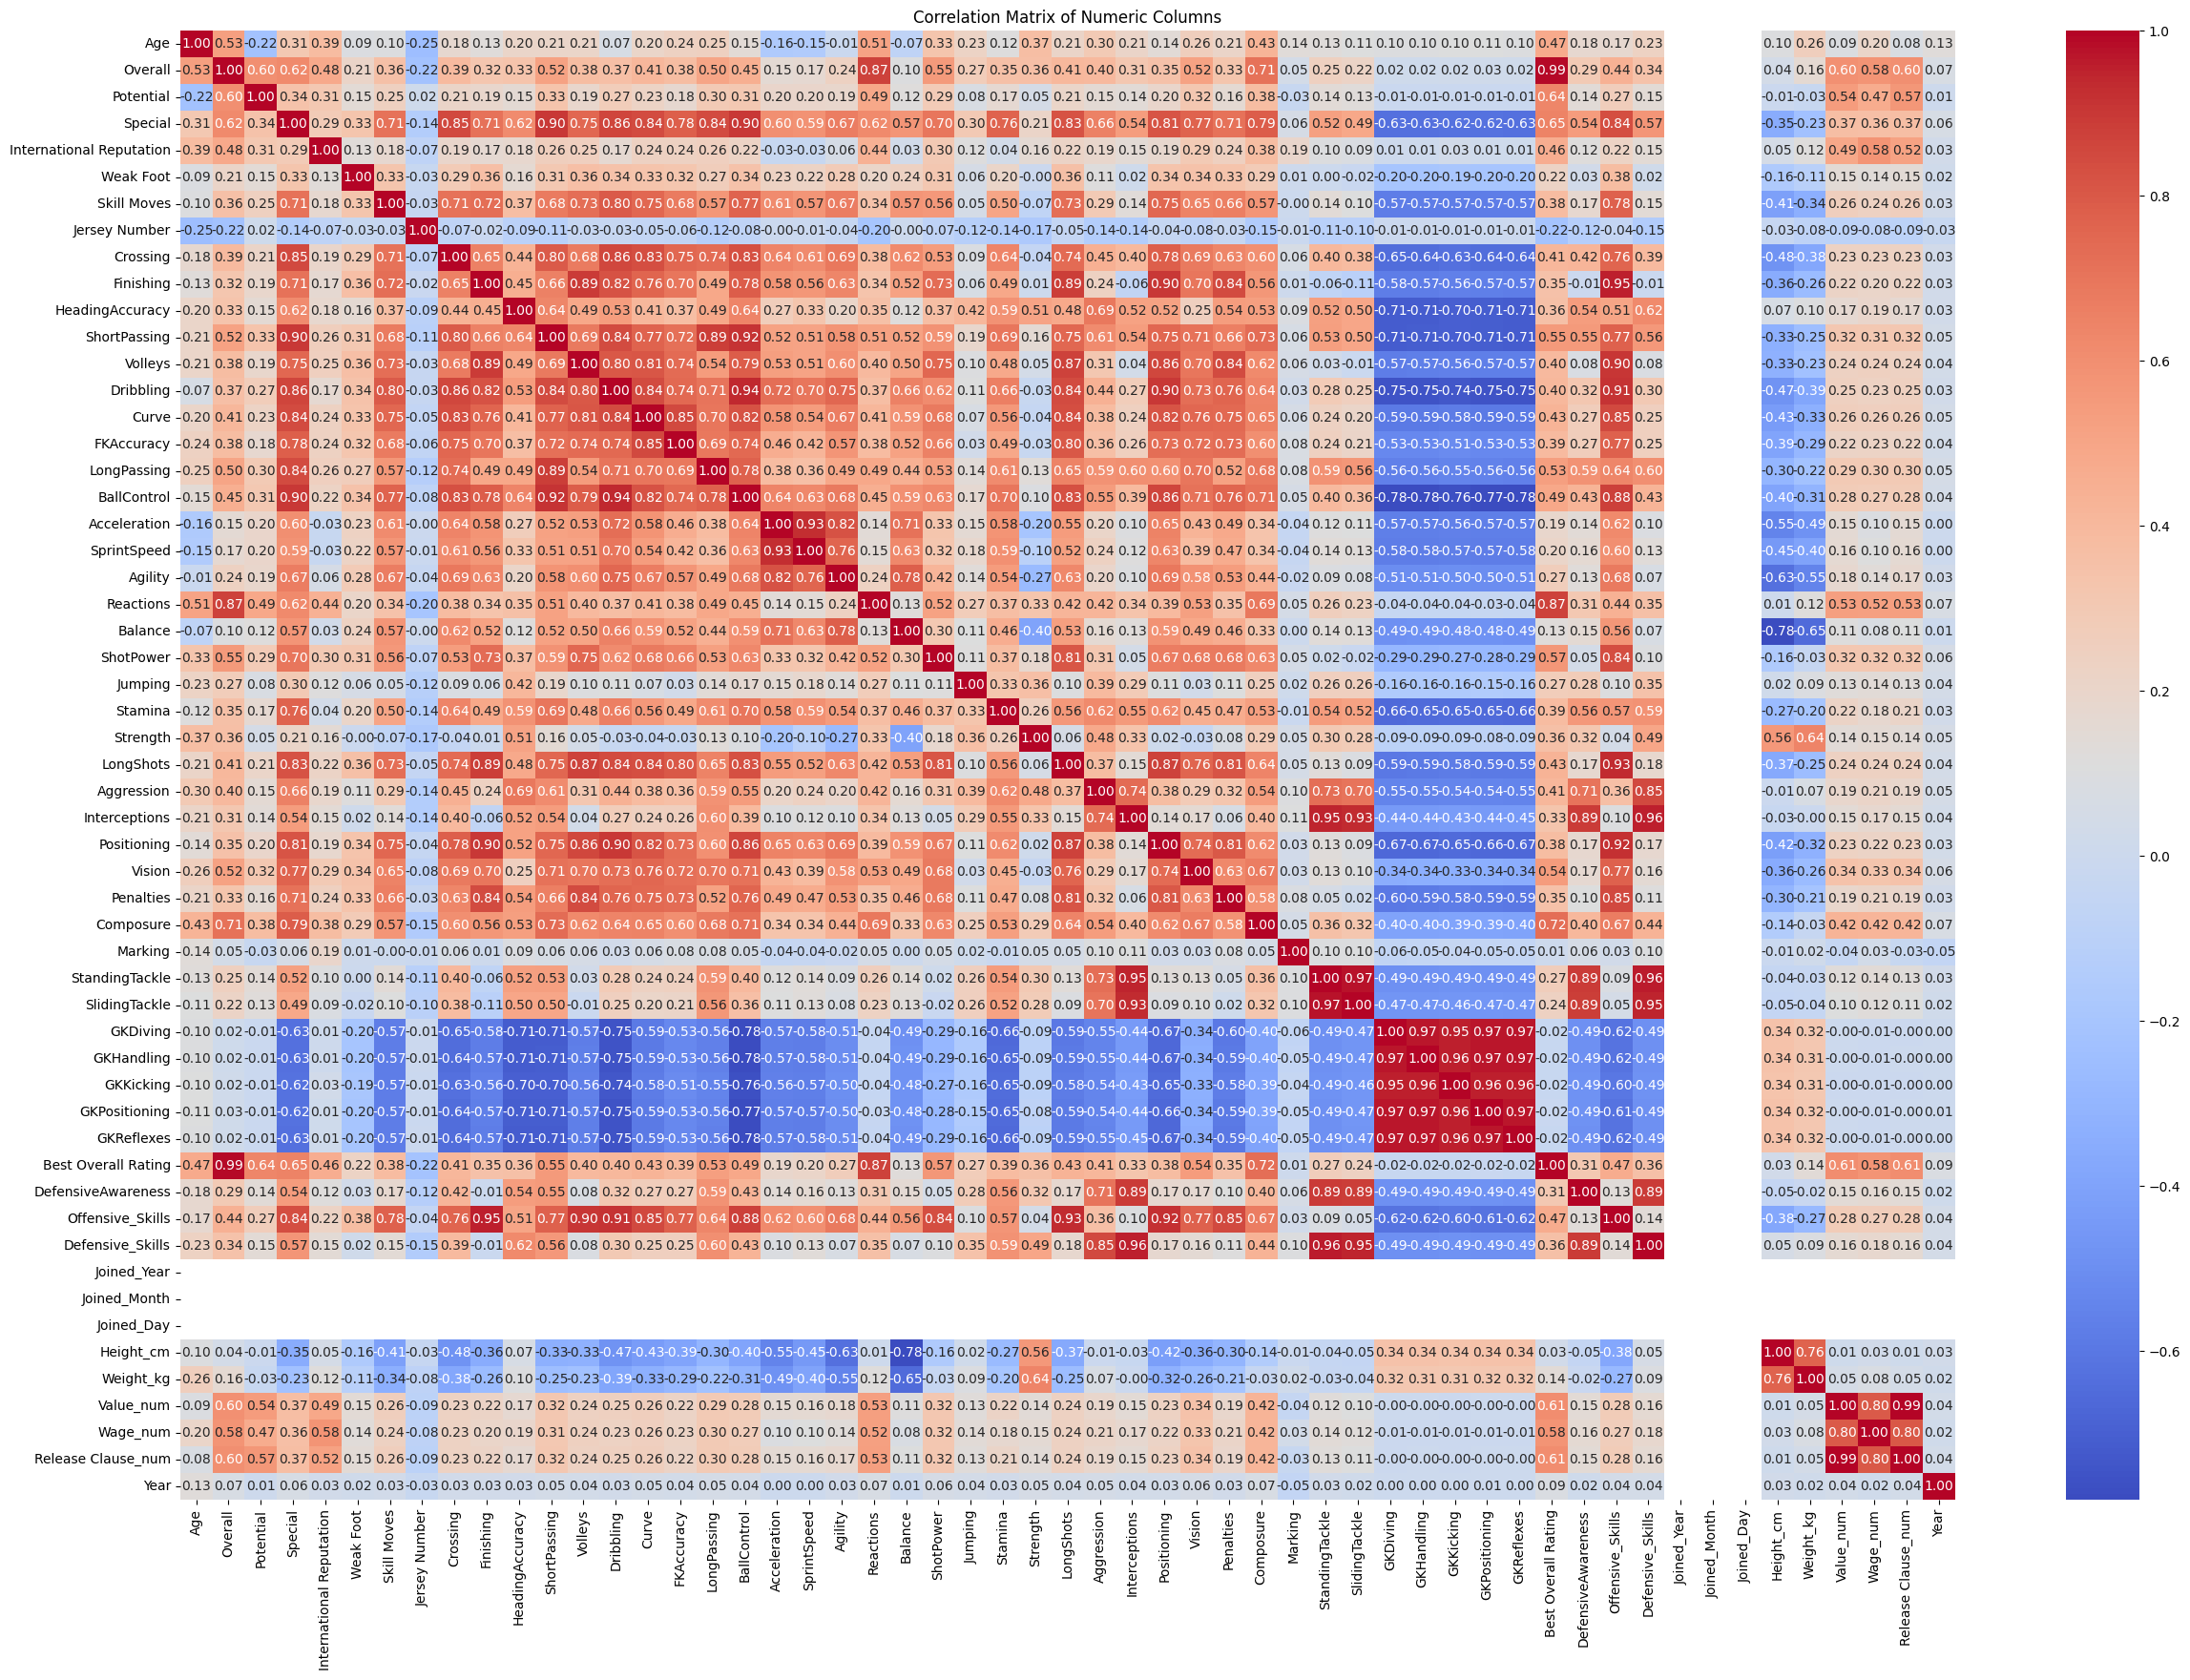

In [51]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### **Gráficos**

- Puedes generar gráficos de dispersión entre la variable objetivo (Y) y las variables predictoras (X) para analizar el comportamiento y la distribución de los datos.
  
- En un modelo de regresión lineal múltiple, una relación lineal fuerte (positiva o negativa) entre las variables puede mejorar el desempeño del modelo.
  
- Ten en cuenta que esto no aplica a todos los modelos, ya que cada uno maneja las relaciones entre variables de forma distinta. Por ejemplo, modelos no lineales (como árboles de decisión o redes neuronales) no dependen de la correlación de Pearson.


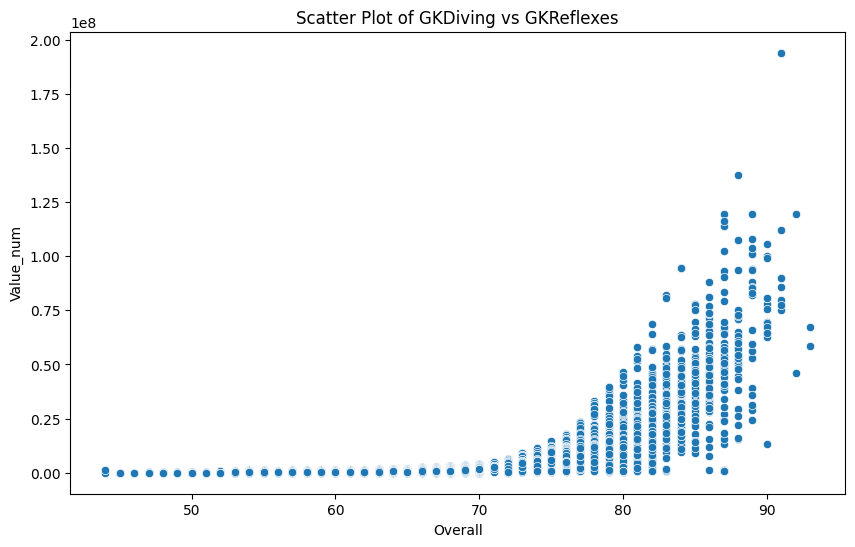

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall', y='Value_num', data=df_FIFA)
plt.title('Scatter Plot of GKDiving vs GKReflexes')
plt.xlabel('Overall')
plt.ylabel('Value_num')
plt.show()

#### **Selección de caracteristicas**

In [75]:
# en X sera la cantidad de caracteristicas (columnas) que le asignaremos para predecir la variable Y 
# En el modelo de regresion lineal multiple, se utiliza mas de una caracteristica o dimension
# No olvidar que para la agregación de caracteristicas debes tener un criterio logico, es decir, que almenos tenga un centido entre
# la la variable X y la Y.

X = df_FIFA[["Best Overall Rating","Special","International Reputation","Reactions","Potential"]] # Todos los modelo deben tener la misma combinación de las caracteristicas, 
                         # en caso de que esa combinacion no de resultados
                         # Realiza otra combinacion, no utilizar diferentes combinaciones en los modelos de regresion 
                         # (El profe lo tomara como malo)

y = df_FIFA['Value_num']

#### **División de los datos en entrenamiento y prueba**

In [76]:
# Dependiendo de tu dataset, lo ideal es dividir los datos en 80% 20% o 70% 30% 
# 80% datos de entrenamiento 
# 20% datos de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, # para entrenamiento usaremos el 20% de los datos
    random_state=42, # Semilla random que definimos
    shuffle = True #si no lo definido, dara el 80% de otra manera, aleatorioa
)

print("Datos de entrenamiento: ",X_train.shape)
print("Datos de prueba: ",X_test.shape)

Datos de entrenamiento:  (40420, 6)
Datos de prueba:  (10106, 6)


#### **Creación y entrenamiento del modelo Linear Regression**

In [77]:
modelo = LinearRegression() #Creacion del modelo (puedes agregar parametros aqui manualmente)
modelo.fit(X_train, y_train) #Entenamiento del modelo con los datos X_train y Y_train

LinearRegression()

#### **Predicciones sobre el conjunto de prueba**

- Ŷ (Y_hat) se lee como “Y sombrero” o “Y predicho”.

**Representa:**
- El valor que el modelo predice para la variable dependiente (Y)
a partir de las variables independientes (X).

In [78]:
Y_hat = modelo.predict(X_test) # Predice con los datos de prueba

### **Métricas de evaluación**

1.  **Mean Squared Error (MSE) - error cuadrático medio**
- El valor de MSE proporciona una manera de analizar la precisión del modelo.
- Mide la **diferencia media al cuadrado** entre los **valores previstos (o predicciones) y los valores reales** en el conjunto de datos.
- Se calcula tomando el promedio de los residuos al cuadrado, donde el residuo es la diferencia entre el valor predicho y el valor real para cada punto de datos.
  
![Image](https://media.geeksforgeeks.org/wp-content/uploads/20250916105317243559/graph.webp)

**Significado del error medio al cuadrado**

El error medio al cuadrado es ampliamente utilizado en varios campos, incluyendo estadísticas, aprendizaje automático y econometría, debido a sus varias propiedades importantes:

- Proporciona la medida cuantitativa de la precisión de los modelos predictivos.
- Penaliza los grandes errores más que los pequeños errores, por lo que es sensible a los valores atípicos.
- Es matemáticamente conveniente y fácil de interpretar, por lo que es una opción preferida para evaluar el rendimiento del modelo.

Referencia: https://www.geeksforgeeks.org/maths/mean-squared-error/

2. **Root Mean Squared Error (RMSE) - raíz del error cuadrático medio**
El error cuadrático medio de raíz (RMSE) es una variante de MSE que calcula la raíz cuadrada de la diferencia cuadrada promedio entre los valores reales y los predichos. A menudo se prefiere sobre MSE, ya que proporciona una medida interpretable del error en las mismas unidades que los datos originales.

   `RMSE = √(MSE)`
  
4. **Mean Absolute Error (MAE) - error absoluto medio** (se puede mejorar la interpretacion)
El error absoluto medio calcula **la diferencia media entre los valores calculados y los valores reales**. También se conoce como precisión dependiente de la escala, ya que calcula el error en las observaciones tomadas en la misma escala utilizada para predecir la precisión del modelo de aprendizaje automático

Referencia: https://www.geeksforgeeks.org/python/how-to-calculate-mean-absolute-error-in-python/ 

  
5. **R2 Score - coeficiente de determinación o R al cuadrado**

Supongamos R 2 = 0,68. Se puede inferir que el 68% de la capacidad de cambio del atributo de salida dependiente puede explicarse por el modelo, mientras que el 32 % restante de la variabilidad todavía no se conoce. 

**En palabras simples:** el modelo explica el 68% de los cambios en Y a partir de X, y el 32% de los cambios no se puede predecir con este modelo.

Un R2 alto **no siempre significa** que el modelo sea “perfecto”, solo que se ajusta bien a los datos de entrenamiento. También hay que revisar el desempeño en datos de prueba para evitar sobreajuste (overfitting).

Referencia: https://www.geeksforgeeks.org/machine-learning/python-coefficient-of-determination-r2-score/

In [80]:
mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)

# Métricas de evaluación
mse = mean_squared_error(y_test, Y_hat)
mae = mean_absolute_error(y_test, Y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_hat)

# Mostrar resultados
print("-- Métricas de Evaluación del Modelo --")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R² (Variance score): {r2:.2f}")

-- Métricas de Evaluación del Modelo --
Mean Squared Error (MSE): 19646258417721.12
Root Mean Squared Error (RMSE): 4432410.001085315
Mean Absolute Error (MAE): 2274760.969629813
R² (Variance score): 0.47


#### **Visualizacion grafica**
esta bien esto 
a veces es mejor investigar que graficos son adecuados para visualizar.

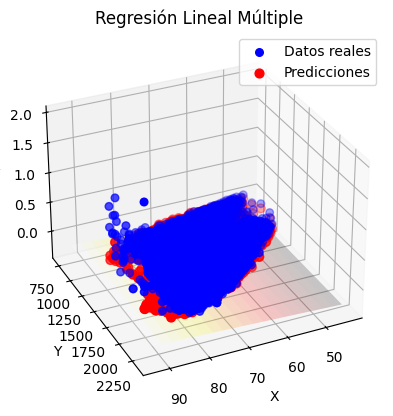

In [67]:
# Convertir DataFrames/Series a arrays
XY_train = X_train.values
z_train = y_train.values
z_pred = modelo.predict(X_train)

# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear malla para el plano (según rango de tus datos)
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 20),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 20)
)

# Calcular z usando coeficientes del modelo
z = modelo.coef_[0] * xx + modelo.coef_[1] * yy + modelo.intercept_

# Graficar el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficar puntos reales
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30, label='Datos reales')

# Graficar puntos predichos
ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40, label='Predicciones')

# Configuración de vista y etiquetas
ax.view_init(elev=30., azim=65)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Y')
ax.set_title('Regresión Lineal Múltiple')
ax.legend()

plt.show()


### **GridsearchCV**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [73]:
modelo = LinearRegression()

param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "positive": [True, False],   # Importante para limitar coeficientes positivos
    "n_jobs": [None, -1]
}

# Crear el GridSearchCV
# cv: número de folds para la validación cruzada. 5 es un valor común.
# Added 'n_jobs=-1' to GridSearchCV for parallel processing
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid,
                           cv=5, # k-fold cross-validation
                           scoring='r2', n_jobs=-1
                          )

# Entrenar el GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

print(f"Mejores parámetros encontrados por GridSearchCV: {best_params}")

# Predecir con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Calcular métricas con el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

# Imprimir resultados del mejor modelo
print("\nMétricas del Modelo de Regresión Lineal con 'mejores parámetros':")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R2 Score: {r2_best}")

Mejores parámetros encontrados por GridSearchCV: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

Métricas del Modelo de Regresión Lineal con 'mejores parámetros':
Mean Squared Error (MSE): 19660072209369.348
Mean Absolute Error (MAE): 2275544.047083455
Root Mean Squared Error (RMSE): 4433967.99823469
R2 Score: 0.46558847500804923


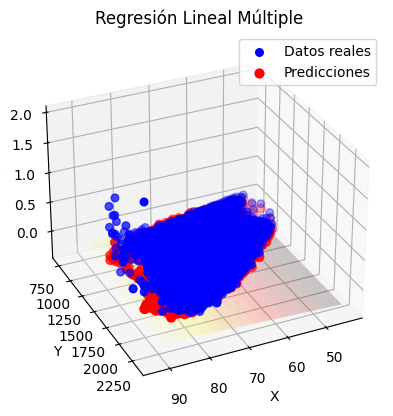

In [74]:
# Convertir DataFrames/Series a arrays
XY_train = X_train.values
z_train = y_train.values
z_pred = best_model.predict(X_train)

# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear malla para el plano (según rango de tus datos)
xx, yy = np.meshgrid(
    np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 20),
    np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 20)
)

# Calcular z usando coeficientes del modelo
z = best_model.coef_[0] * xx + best_model.coef_[1] * yy + best_model.intercept_

# Graficar el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficar puntos reales
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30, label='Datos reales')

# Graficar puntos predichos
ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40, label='Predicciones')

# Configuración de vista y etiquetas
ax.view_init(elev=30., azim=65)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Y')
ax.set_title('Regresión Lineal Múltiple')
ax.legend()

plt.show()

**Referencia bibliografica**

https://scikit-learn.org/stable/modules/cross_validation.html

https://inside-machinelearning.com/en/cross-validation-tutorial/?utm_source

scikit-learn cross_validate:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

## **Resultados y Conclusiones**

#### **Resultado 1:** Modelo sin hiperparametros
#### **Resultado 2:** GridsearchCV